In [1]:
!pip install nltk
!pip install spacy
!pip install wordcloud
!pip install -U textblob

In [2]:
import pandas as pd
import numpy as np

import requests
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import twitter_samples

from textblob import TextBlob
from textblob import Word
    
from sklearn.feature_extraction.text import TfidfVectorizer

from bs4 import BeautifulSoup

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
data = pd.read_csv('Elon_musk.csv',encoding="latin-1")

In [7]:
df = data.copy()
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [9]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
df[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


In [10]:
stop = stopwords.words('english')

df['stopwords']= df['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [11]:
df['hashtags'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Text','hashtags']].head()

,Text,hashtags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


In [12]:
df['numerics'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [13]:
df['upper'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [14]:
df['upper'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [15]:
df['Text'] = df['Text'].str.replace('[^\w\s]','')
df['Text'].head()

<ipython-input-15-05684c39a930>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 Im an alien
1    ID_AA_Carmack Ray tracing on Cyberpunk with HD...
2                     joerogan Spotify Great interview
3                       gtera27 Doge is underestimated
4    teslacn Congratulations Tesla China for amazin...
Name: Text, dtype: object

In [16]:
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'].head()

0                                    kunalb11 Im alien
1    ID_AA_Carmack Ray tracing Cyberpunk HDR nextle...
2                     joerogan Spotify Great interview
3                          gtera27 Doge underestimated
4    teslacn Congratulations Tesla China amazing ex...
Name: Text, dtype: object

In [17]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:10]
freq

SpaceX            238
amp               218
Tesla             166
Erdayastronaut    142
RT                127
PPathole          123
I                 116
flcnhvy           114
The                81
Yes                81
dtype: int64

In [18]:
freq = list(freq.index)
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Text'].head()

0                                    kunalb11 Im alien
1    ID_AA_Carmack Ray tracing Cyberpunk HDR nextle...
2                     joerogan Spotify Great interview
3                          gtera27 Doge underestimated
4    teslacn Congratulations China amazing executio...
Name: Text, dtype: object

In [19]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[-10:]
freq

httpstco9SsChDKFAD    1
watching              1
unveiled              1
Successful            1
httpstcosdmXKbHdzd    1
VelociRaptor          1
httpstco9qXYxMMIUj    1
Tumblr                1
Moms                  1
Planet                1
dtype: int64

In [20]:
freq = list(freq.index)
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Text'].head()

0                                    kunalb11 Im alien
1    ID_AA_Carmack Ray tracing Cyberpunk HDR nextle...
2                     joerogan Spotify Great interview
3                          gtera27 Doge underestimated
4    teslacn Congratulations China amazing executio...
Name: Text, dtype: object

In [21]:
df['Text'][:5].apply(lambda x :str(TextBlob(x).correct()))

0                                    kunalb11 Am alien
1    ID_AA_Carmack May tracing Cyberpunk HDR nextle...
2                      joerogan Notify Great interview
3                           gtera27 One underestimated
4    teslacn Congratulations China amazing executio...
Name: Text, dtype: object

In [22]:
TextBlob(df['Text'][1]).words

WordList(['ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried'])

<AxesSubplot:xlabel='word_count', ylabel='avg_word'>

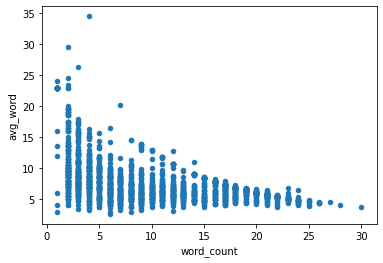

In [23]:
df.plot.scatter(y='avg_word',x='word_count')

<AxesSubplot:xlabel='hashtags', ylabel='numerics'>

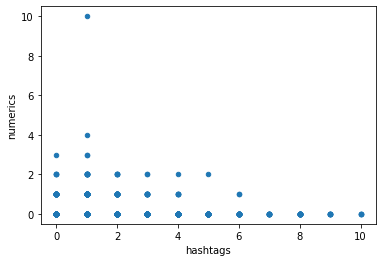

In [24]:
df.plot.scatter(x='hashtags',y='numerics')

<AxesSubplot:xlabel='stopwords', ylabel='upper'>

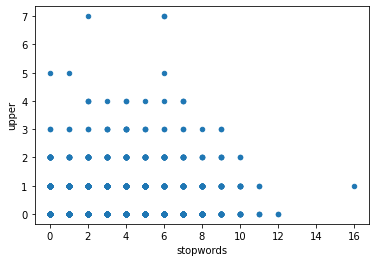

In [25]:
df.plot.scatter(x='stopwords',y='upper')

In [26]:
from nltk.stem import PorterStemmer

In [27]:
st = PorterStemmer()

df['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                     joerogan spotifi great interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

In [28]:
from textblob import Word

In [29]:
df["Text"] = df['Text'].apply(lambda x : ' '.join([Word(word).lemmatize() for word in x.split()]))
df['Text'].head()

0                                    kunalb11 Im alien
1    ID_AA_Carmack Ray tracing Cyberpunk HDR nextle...
2                     joerogan Spotify Great interview
3                          gtera27 Doge underestimated
4    teslacn Congratulations China amazing executio...
Name: Text, dtype: object

In [30]:
import codecs
import re
import copy
import collections

from __future__ import division

In [31]:
with codecs.open("positive-words.txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [32]:
with codecs.open("negative-words.txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [33]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [34]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\chaga\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [35]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')

In [36]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [37]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

print(tweet_tokens[0])

#FollowFriday


In [38]:
no_pages = 2

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})
        
        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls  

In [39]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating','Customers_Rated', 'Price'])
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [40]:
amz = pd.read_csv("amazon_products.csv")

In [41]:
df1 = amz.copy()

In [42]:
df1.head()

,Book Name,Author,Rating,Customers_Rated,Price
0,"My Life in Full: Work, Family, and Our Future ...",Indra K. Nooyi,4.1 out of 5 stars,8,₹480.00
1,The Psychology of Money,Morgan Housel,4.6 out of 5 stars,"18,078",₹277.00
2,Word Power Made Easy,Norman Lewis,4.4 out of 5 stars,"29,012",₹99.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5 out of 5 stars,"37,541",₹385.00
4,Educart TERM 1 MCQ Question Bank Class 10 Bund...,Educart,4.1 out of 5 stars,478,₹449.00


In [43]:
df1.shape

(100, 5)

In [44]:
df1['Rating'] = df1['Rating'].apply(lambda x: x.split()[0])

In [45]:
df1['Rating'] = pd.to_numeric(df1['Rating'])

In [46]:
df1["Price"] = df1["Price"].str.replace('₹', '')

In [47]:
df1['Price'] = df1['Price'].apply(lambda x: x.split('.')[0])

In [48]:
df1['Price'] = df1['Price'].astype(int)

In [49]:
df1["Customers_Rated"] = df1["Customers_Rated"].str.replace(',', '')

In [50]:
df1['Customers_Rated'] = pd.to_numeric(df1['Customers_Rated'], errors='ignore')

In [51]:
df1.head()

,Book Name,Author,Rating,Customers_Rated,Price
0,"My Life in Full: Work, Family, and Our Future ...",Indra K. Nooyi,4.1,8,480
1,The Psychology of Money,Morgan Housel,4.6,18078,277
2,Word Power Made Easy,Norman Lewis,4.4,29012,99
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,37541,385
4,Educart TERM 1 MCQ Question Bank Class 10 Bund...,Educart,4.1,478,449


In [52]:
df1.dtypes

Book Name           object
Author              object
Rating             float64
Customers_Rated      int64
Price                int32
dtype: object

In [53]:
df1.isnull().sum()

Book Name          0
Author             0
Rating             0
Customers_Rated    0
Price              0
dtype: int64

In [54]:
df1.replace(str(0), np.nan, inplace=True)
df1.replace(0, np.nan, inplace=True)
df1['Author'] = df1['Author'].fillna('')

In [55]:
count_nan = len(df) - df1.count()

In [56]:
count_nan

Book Name          0
Author             0
Rating             0
Customers_Rated    2
Price              0
dtype: int64

In [57]:
df1 = df1.dropna()

In [58]:
data1 = df1.sort_values(["Price"], axis=0, ascending=False)[:15]

In [59]:
data1

,Book Name,Author,Rating,Customers_Rated,Price
34,Educart ICSE Semester 1 MCQ Sample Papers Book...,Educart,4.7,36.0,840
32,Chapterwise MCQs Bundle For ICSE Class 10 Seme...,Oswal - Gurukul,4.0,40.0,750
80,"Oswaal CBSE MCQs Chapterwise For Term I & II, ...",Oswaal Editorial Board,4.3,119.0,750
21,Indian Polity - For Civil Services and Other S...,M. Laxmikanth,4.6,16379.0,641
31,Objective NCERT at your FINGERTIPS for NEET-AI...,MTG Editorial Board,4.6,5179.0,570
52,"India that is Bharat: Coloniality, Civilisatio...",J Sai Deepak,4.9,699.0,565
7,Atomic Habits: The life-changing million copy ...,James Clear,4.6,25933.0,551
95,Indian Art and Culture for Civil Services and ...,Nitin Singhania,4.6,4934.0,545
74,A Modern Approach To Verbal & Non-Verbal Reaso...,R.S. Aggarwal,4.4,8610.0,536
51,Best of Children’s Classics (Set of 5 Books): ...,Antoine de Saint-Exupéry,4.4,2182.0,499


In [60]:
import math
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import push_notebook, show, output_notebook
from bokeh.transform import factor_cmap
from bokeh.models import Legend
from bokeh.palettes import Dark2_5 as palette
from bokeh.plotting import figure
import itertools
from bokeh.palettes import d3
output_notebook()

Loading BokehJS ...

In [61]:
p = figure(x_range=data1.iloc[:,1], plot_width=800, plot_height=550, title="Authors Highest Priced Book", toolbar_location=None, tools="")

p.vbar(x=data1.iloc[:,1], top=data1.iloc[:,4], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = math.pi/2

In [62]:
print(p)

Figure(id='1003', ...)


In [63]:
data2 = df1[df1['Customers_Rated']>1000]
data2

,Book Name,Author,Rating,Customers_Rated,Price
1,The Psychology of Money,Morgan Housel,4.6,18078.0,277
2,Word Power Made Easy,Norman Lewis,4.4,29012.0,99
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,37541.0,385
6,Ikigai: The Japanese secret to a long and happ...,Héctor García,4.6,23826.0,324
7,Atomic Habits: The life-changing million copy ...,James Clear,4.6,25933.0,551
...,...,...,...,...,...
94,Apke Avchetan Man Ki Shakti (The Power of your...,Joseph Murphy,4.4,5214.0,99
95,Indian Art and Culture for Civil Services and ...,Nitin Singhania,4.6,4934.0,545
97,"The 5 AM Club: Own Your Morning, Elevate Your ...",Robin Sharma,4.5,15477.0,238
98,The Official Cambridge Guide To Ielts Student'...,Pauline Cullen,4.4,3736.0,439


In [64]:
data2 = data2.sort_values(['Rating'],axis=0, ascending=False)[:15]
data2

,Book Name,Author,Rating,Customers_Rated,Price
90,"The Magic of the Lost Temple: Illustrated, eas...",Sudha Murty,4.7,4502.0,150
72,Think Like a Monk: The secret of how to harnes...,Jay Shetty,4.7,18077.0,320
70,Karma: A Yogi's Guide to Crafting Your Destiny...,Sadhguru,4.7,5277.0,233
44,Sapiens: A Brief History of Humankind,Yuval Noah Harari,4.7,38208.0,345
84,Brijbhoomi Books And Handicrafts® Bhagavad Git...,Brijbhoomi Books And Handicrafts,4.7,9932.0,140
31,Objective NCERT at your FINGERTIPS for NEET-AI...,MTG Editorial Board,4.6,5179.0,570
76,The Psychology of Money – Deluxe Edition,Morgan Housel,4.6,18078.0,330
21,Indian Polity - For Civil Services and Other S...,M. Laxmikanth,4.6,16379.0,641
19,Grandma's Bag of Stories: Collection of 20+ Il...,Sudha Murty,4.6,9883.0,185
1,The Psychology of Money,Morgan Housel,4.6,18078.0,277


In [65]:
p1 = figure(x_range=data1.iloc[:,0], plot_width=800, plot_height=600, title="Top Rated Books with more than 1000 Customers Rating", toolbar_location=None, tools="")

p1.vbar(x=data1.iloc[:,0], top=data1.iloc[:,2], width=0.9)

p1.xgrid.grid_line_color = None
p1.y_range.start = 0
p1.xaxis.major_label_orientation = math.pi/2
p1


Figure(id='1027', ...)

In [66]:
show(p1)

In [67]:
p2 = figure(x_range=data1.iloc[:,1], plot_width=800, plot_height=600, title="Top Rated Books with more than 1000 Customers Rating", toolbar_location=None, tools="")

p2.vbar(x=data1.iloc[:,1], top=data1.iloc[:,2], width=0.9)

p2.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = math.pi/2
p2

Figure(id='1108', ...)

In [68]:
data4 = df1.sort_values(["Customers_Rated"], axis=0, ascending=False)[:20]
data4

,Book Name,Author,Rating,Customers_Rated,Price
87,"The Silent Patient: The record-breaking, multi...",Alex Michaelides,4.5,77486.0,297
11,The Alchemist,Paulo Coelho,4.6,65385.0,178
91,How to Win Friends and Influence People,Dale Carnegie,4.5,55452.0,95
26,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.5,52925.0,319
8,Rich Dad Poor Dad: What the Rich Teach Their K...,Robert T. Kiyosaki,4.6,47960.0,305
22,The Power of Your Subconscious Mind,Joseph Murphy,4.5,42032.0,150
44,Sapiens: A Brief History of Humankind,Yuval Noah Harari,4.7,38208.0,345
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,37541.0,385
55,Man's Search For Meaning: The classic tribute ...,Viktor E Frankl,4.5,35187.0,193
2,Word Power Made Easy,Norman Lewis,4.4,29012.0,99


<AxesSubplot:xlabel='Book Name', ylabel='Price'>

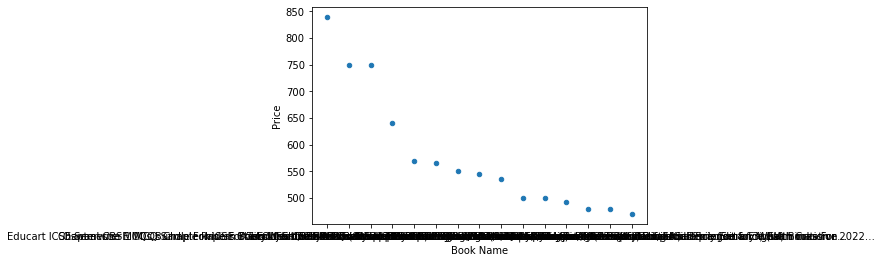

In [76]:
data1.plot.scatter(x='Book Name',y='Price')

<AxesSubplot:xlabel='Book Name', ylabel='Rating'>

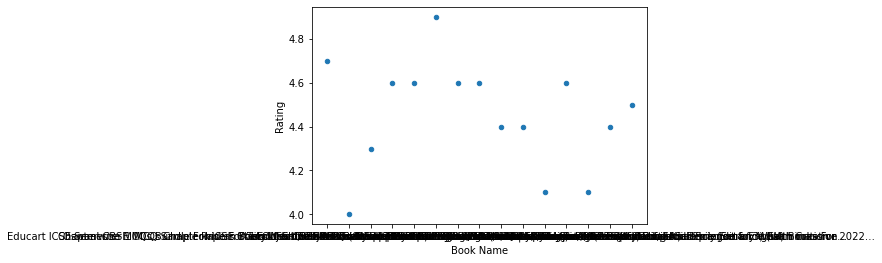

In [77]:
data1.plot.scatter(x='Book Name',y='Rating')